**Project: Superstore Profit and Discount Analysis**

**Overview:**

This project analyzes profit data from the Superstore dataset to understand why profit losses are occurring.

**Problem Statement:**

Some orders in the Superstore dataset are loss-making.
The goal is to identify which products and discount levels are responsible for these losses.

**Approach:**
- Load the Superstore dataset
- Analyze profit and loss orders
- Study how discounts affect profit for key products

In [19]:
import pandas as pd
df = pd.read_csv("superstore.csv")
print(df.head())

        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit Profit_Status  
0      0.00   41.9136        Profit  
1      0.00  219

In [5]:
df1=df['Profit_Status'] = df['Profit'].apply(
    lambda x: 'Profit' if x > 0 else ('Loss' if x < 0 else 'Break-even')
)
print(df1)

0       Profit
1       Profit
2       Profit
3         Loss
4       Profit
         ...  
9989    Profit
9990    Profit
9991    Profit
9992    Profit
9993    Profit
Name: Profit, Length: 9994, dtype: object


In [7]:
# Filter only loss-making orders
loss_df = df[df['Profit_Status'] == 'Loss']
# Create a column to classify each order as Profit, Loss, or Break-even
loss_by_subcat = loss_df.groupby('Sub-Category')['Profit'].sum().sort_values()
print(loss_by_subcat)

Sub-Category
Binders       -38510.4964
Tables        -32412.1483
Machines      -30118.6682
Bookcases     -12152.2060
Chairs         -9880.8413
Appliances     -8629.6412
Phones         -7530.6235
Furnishings    -6490.9134
Storage        -6426.3038
Supplies       -3015.6219
Accessories     -930.6265
Fasteners        -33.1952
Name: Profit, dtype: float64


In [8]:
binders_df = df[df['Sub-Category'] == 'Binders']

binders_discount = binders_df.groupby('Discount')['Profit'].sum()
print(binders_discount)


Discount
0.0    39314.4507
0.2    29417.8090
0.7   -16601.0984
0.8   -21909.3980
Name: Profit, dtype: float64


In [9]:
tables_df = df[df['Sub-Category'] == 'Tables']

tables_discount = tables_df.groupby('Discount')['Profit'].sum()
print(tables_discount)


Discount
0.00    13276.2997
0.20     -303.5580
0.30    -3402.3276
0.40   -16187.3968
0.45    -2493.1111
0.50    -8615.3873
Name: Profit, dtype: float64


In [10]:
machines_df = df[df['Sub-Category'] == 'Machines']

machines_discount = machines_df.groupby('Discount')['Profit'].sum()
print(machines_discount)


Discount
0.0    27137.8223
0.1      832.0843
0.2     4970.2024
0.3      326.0395
0.4    -2666.8434
0.5    -7635.2291
0.7   -19579.3191
Name: Profit, dtype: float64


**Key Insights:**
- Losses are mainly caused by high discounts not by products or regions.
- Tables cause losses even at small discounts starting from 20%.
- Machines start causing losses when discounts reach around 40%.
- Binders make profit at low discounts but cause large losses at very high discounts (70–80%).
- Different products have different discount limits.

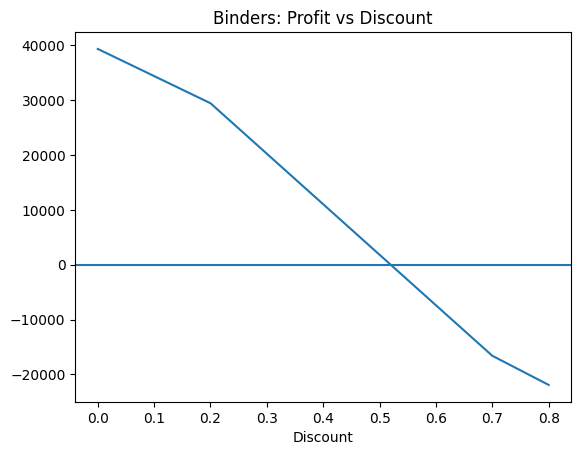

In [11]:
import matplotlib.pyplot as plt

binders_discount.plot(kind='line')
plt.axhline(0)
plt.title("Binders: Profit vs Discount")
plt.show()


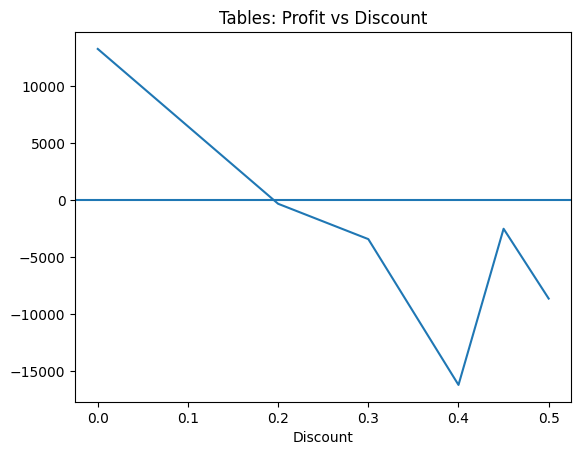

In [18]:
tables_discount.plot(kind='line')
plt.axhline(0)
plt.title("Tables: Profit vs Discount")
plt.show()


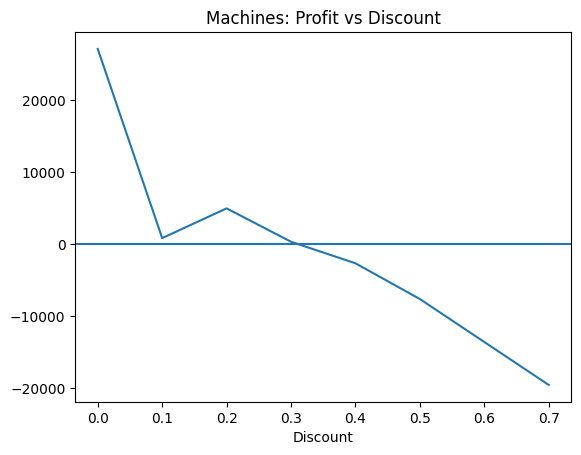

In [17]:
machines_discount.plot(kind='line')
plt.axhline(0)
plt.title("Machines: Profit vs Discount")
plt.show()


**Business Recommendations:**
- Do not give discounts on Tables as they quickly lead to losses.
- Limit Machine discounts to a maximum of 30%.
- Avoid extreme discounts on Binders and keep them at low levels.
- Use different discount limits for different products instead of one rule for all.

**Conclusion:**

Profit losses in the Superstore dataset are caused by discounts that exceed safe limits for certain products. Applying product-specific discount rules
can reduce losses and improve overall profitability.